In [58]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    plot_confusion_matrix,
    accuracy_score,
    plot_roc_curve,
    precision_score,
    recall_score,
    RocCurveDisplay
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    train_test_split
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import datetime

#from utils import plot_decision_boundary

In [59]:
os.chdir('C:/Users/Student/Documents/EHR---Team-6-Project')


In [5]:
MemMonths = pd.read_csv('MemMonthsMostWidester.csv')

In [29]:
MemYear = pd.read_csv('MemberYear.csv')

In [11]:
#logspace-- what power base 10 are we raising to
C_candidates = np.logspace(-2, 0, 20) #Grid of 20 points between 10^-2 and 10^0 (which is 1)
gamma_candidates = np.logspace(-2, 1, 20) #Grid of 20 points between 10^-2 and 10^1 (which is 10)

In [20]:
k_fold = KFold(n_splits=2, shuffle=True, random_state=42) #setting up our number of folds

In [12]:
MemYear.head()

,PATIENT,Years (MemMonth),ISMALE,white,other,black,asian,ISHISPANIC,ISMARRIED,ambulatory,...,emergency,Atrial Fibrillation,Chronic congestive heart failure (disorder),Coronary Heart Disease,Myocardial Infarction,Cardiac Arrest,DeceasedFlag,History of cardiac arrest (situation),History of myocardial infarction (situation),Cardiac Event
0,01541ad3-5323-cb64-96a7-c2ef42941253,1987,1,1,0,0,0,0,0,154.98,...,0.0,0,0,0,0,0,0,0,0,0
1,01541ad3-5323-cb64-96a7-c2ef42941253,1988,1,1,0,0,0,0,0,154.98,...,0.0,0,0,0,0,0,0,0,0,0
2,01541ad3-5323-cb64-96a7-c2ef42941253,1989,1,1,0,0,0,0,0,77.49,...,0.0,0,0,0,0,0,0,0,0,0
3,01541ad3-5323-cb64-96a7-c2ef42941253,1990,1,1,0,0,0,0,0,0.00,...,0.0,0,0,0,0,0,0,0,0,0
4,01541ad3-5323-cb64-96a7-c2ef42941253,1991,1,1,0,0,0,0,0,0.00,...,0.0,0,0,1,0,0,0,0,0,1


In [38]:

X = MemYear.drop(['Years (MemMonth)', 'PATIENT', 'Cardiac Event', 'Atrial Fibrillation', 'Chronic congestive heart failure (disorder)', 'Coronary Heart Disease', 'Myocardial Infarction', 'Cardiac Arrest', 'DeceasedFlag'], axis = 1)

Y = MemYear['Cardiac Event']


#'Cardiac Event', 'DeceasedFlag'

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42) #Splitting into a 70/30% split

In [40]:
svm_pipeline = make_pipeline(StandardScaler(), #Scaling features-- want to make sure our distance computations are dominated by predictors that have large variability
                             SVC(random_state=42))

In [41]:
#Looking in a "box" 20 points on gamma axis (depth) and 20 points on x? axis (width); either way 400 candidates total
grid_search_cv = GridSearchCV(svm_pipeline, 
                              dict(svc__C=C_candidates, svc__gamma=gamma_candidates), #C parameter is the marginal regularlization strength
                              cv=k_fold).fit(X_train, Y_train) #two folds defined above

In [42]:
grid_search_cv.best_params_

{'svc__C': 0.29763514416313175, 'svc__gamma': 0.01}

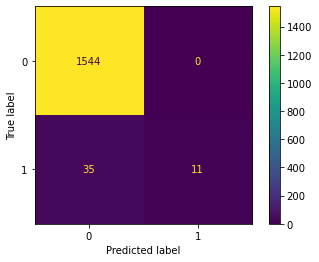

In [44]:
_ = ConfusionMatrixDisplay.from_estimator(grid_search_cv.best_estimator_, X_test, Y_test)

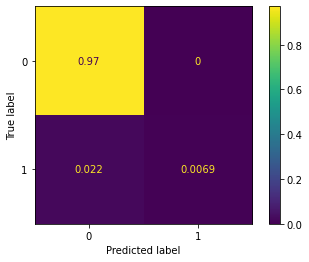

In [45]:
_ = ConfusionMatrixDisplay.from_estimator(grid_search_cv.best_estimator_, X_test, Y_test, normalize='all')

In [46]:
precision_recall['svm'] = {
    'precision': precision_score(Y_test, grid_search_cv.best_estimator_.predict(X_test)),
    'recall': recall_score(Y_test, grid_search_cv.best_estimator_.predict(X_test))
}

NameError: name 'precision_recall' is not defined

In [47]:
precision_score(Y_test, grid_search_cv.best_estimator_.predict(X_test))

1.0

In [48]:
recall_score(Y_test, grid_search_cv.best_estimator_.predict(X_test))

0.2391304347826087

In [53]:
accuracy_score(Y_test, grid_search_cv.best_estimator_.predict(X_test))

0.9779874213836478

In [27]:
precision_recall

NameError: name 'precision_recall' is not defined

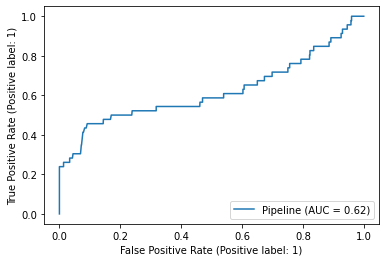

In [54]:
_ = RocCurveDisplay.from_estimator(grid_search_cv.best_estimator_, X_test, Y_test)

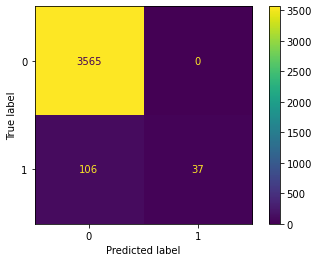

In [65]:
_ = ConfusionMatrixDisplay.from_estimator(grid_search_cv.best_estimator_, X_train, Y_train)

In [68]:
recall_score(Y_train, grid_search_cv.best_estimator_.predict(X_train))

0.25874125874125875